In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
target_file_path = "/content/drive/MyDrive/machine_learning_challenge/ML-challenge/EX_challenging_problems/01_guessing_titanic_survivors/titanic.csv"
features = pd.read_csv(target_file_path, index_col = 0)

In [11]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### EDA
(Explanatory Data Analysis)

In [34]:
# Imported code

def bar_chart(feature):
  survived = features[features['Survived'] == 1][feature].value_counts()
  dead     = features[features['Survived'] == 0][feature].value_counts()
  df       = pd.DataFrame([survived, dead])
  df.index = ['Surevived', 'Dead']
  df.plot(kind = 'bar', stacked = True, figsize = (10,5))

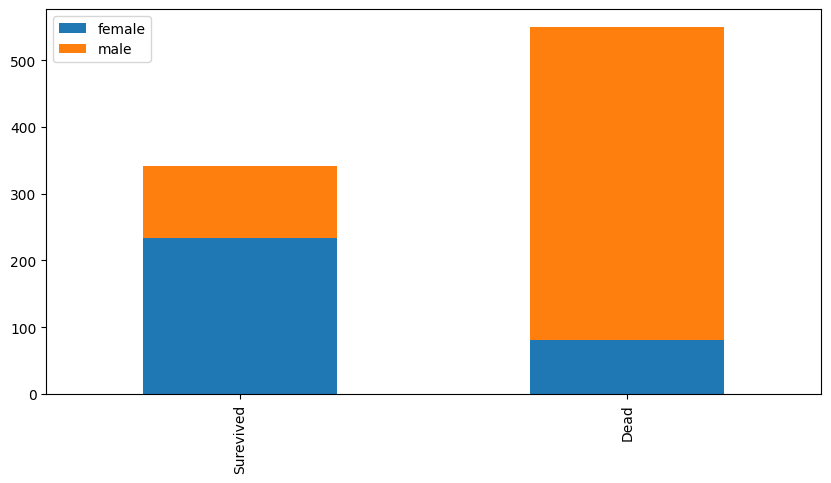

In [35]:
# Men and women, which gender died more?

bar_chart("Sex")

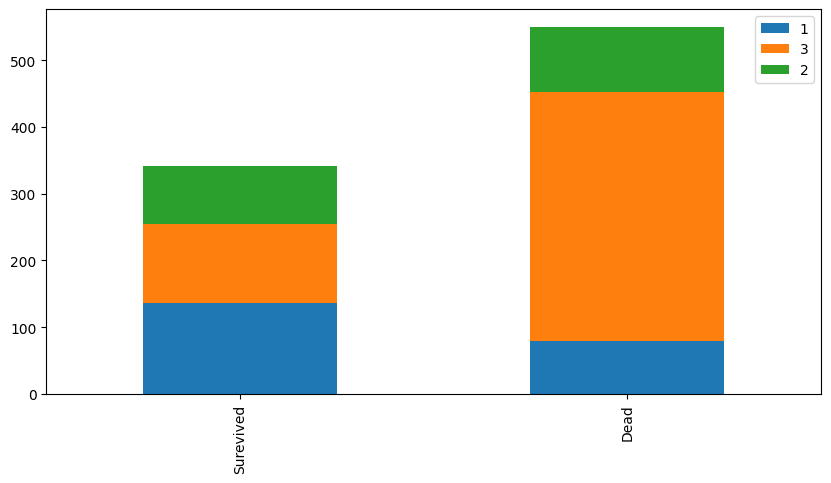

In [37]:
# Ticket?

bar_chart("Pclass")

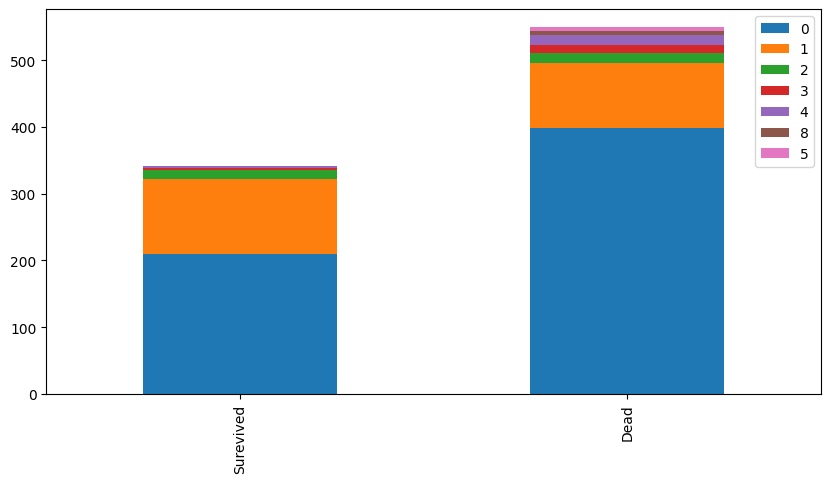

In [38]:
bar_chart('SibSp')

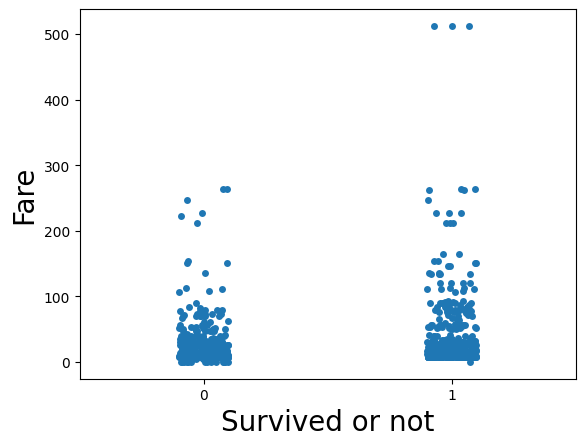

In [40]:
# Fare?

import seaborn as sns

sns.stripplot(x = 'Survived', y = 'Fare', data = features, jitter = True)
plt.xlabel('Survived or not', fontsize = 20)
plt.ylabel('Fare', fontsize = 20)


plt.show()

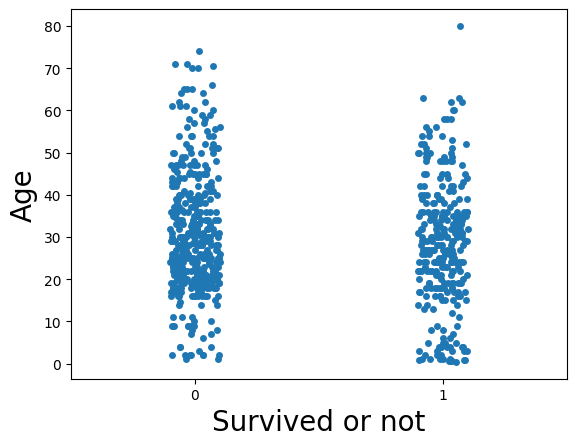

In [41]:
# Age?

import seaborn as sns

sns.stripplot(x = 'Survived', y = 'Age', data = features, jitter = True)
plt.xlabel('Survived or not', fontsize = 20)
plt.ylabel('Age', fontsize = 20)


plt.show()

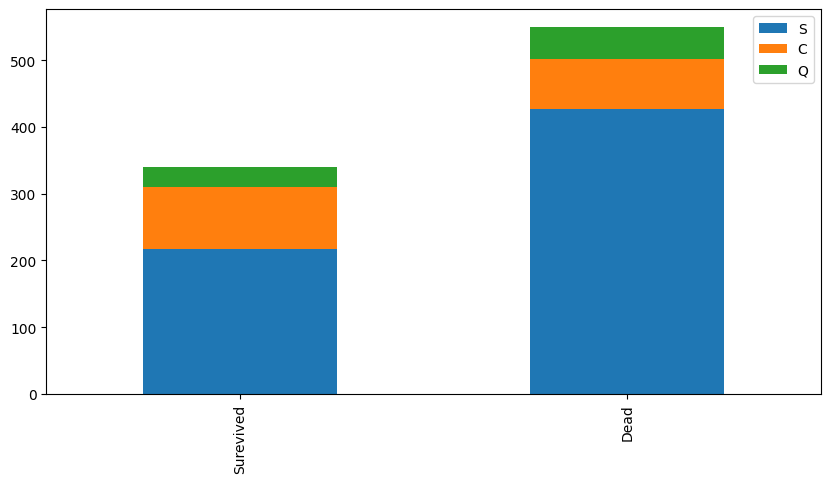

In [46]:
# Embarked?

bar_chart('Embarked')

<Axes: >

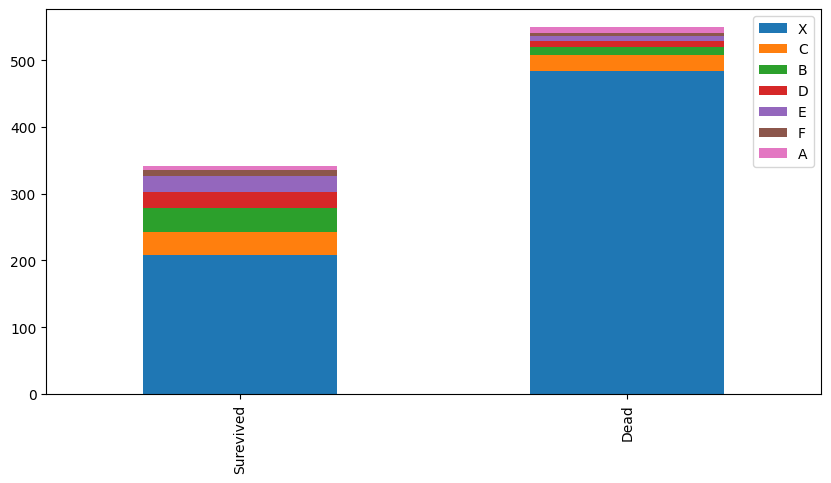

In [51]:
# How about cabin?

features_for_cabin = features
features_for_cabin["Age"]   = features_for_cabin["Age"].fillna(features["Age"].mean())
features_for_cabin["Cabin"] = features_for_cabin["Cabin"].fillna("X").apply(lambda x : x[0])
features_for_cabin["Cabin"] = features_for_cabin["Cabin"].replace({'G' : 'X', 'T' : 'X'})

survived = features_for_cabin[features_for_cabin['Survived'] == 1]["Cabin"].value_counts()
dead     = features_for_cabin[features_for_cabin['Survived'] == 0]["Cabin"].value_counts()
df       = pd.DataFrame([survived, dead])
df.index = ['Surevived', 'Dead']
df.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [64]:
# Name? 
# Name ---> social grade ---> affects to the probability to be survived?

name_list = features['Name'].apply(lambda name : name.split(",")[1].split(".")[0].replace(" ", ""))
print(name_list)
print(name_list.unique().tolist())

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Name, Length: 891, dtype: object
['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'theCountess', 'Jonkheer']


In [72]:
# arbitrarily scored according to the appellation, assisted by Google Bard AI.
appellation_score = {
    "Lady": 100,
    "theCountess": 95,
    "Mme": 90,
    "Ms": 85,
    "Mrs": 80,
    "Miss": 75,
    "Don": 70,
    "Rev": 65,
    "Dr": 60,
    "Major": 55,
    "Sir": 50,
    "Col": 45,
    "Mr" : 45,
    "Capt": 40,
    "Master": 35,
    "Mlle": 30,
    "Jonkheer": 25
}

def name_to_priority_assumption(name):
  appellation = name.split(",")[1].split(".")[0].replace(" ", "")
  return appellation_score[appellation]

# Redefine
features_for_name = features
features_for_name["Name"] = features_for_name["Name"].apply(lambda x : name_to_priority_assumption(x))

print(features_for_name)

             Survived  Pclass  Name     Sex        Age  SibSp  Parch  \
PassengerId                                                            
1                   0       3    45    male  22.000000      1      0   
2                   1       1    80  female  38.000000      1      0   
3                   1       3    75  female  26.000000      0      0   
4                   1       1    80  female  35.000000      1      0   
5                   0       3    45    male  35.000000      0      0   
...               ...     ...   ...     ...        ...    ...    ...   
887                 0       2    65    male  27.000000      0      0   
888                 1       1    75  female  19.000000      0      0   
889                 0       3    75  female  29.699118      1      2   
890                 1       1    45    male  26.000000      0      0   
891                 0       3    45    male  32.000000      0      0   

                       Ticket     Fare Cabin Embarked  
Passeng